In [1]:
# a. Loading and preprocessing the image data
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
import tensorflow as tf
import random

In [2]:
train_dir = r"C:\Users\Sohel\Downloads\mnist-jpg\mnist-jpg\train"
test_dir = r"C:\Users\Sohel\Downloads\mnist-jpg\mnist-jpg\test"

img_height, img_width = 28, 28
batch_size = 32



# Load images from folders
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    color_mode="grayscale",
    label_mode="int",
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    color_mode="grayscale",
    label_mode="int",
    batch_size=batch_size,
    shuffle=False
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
# Normalize pixel values [0,1]
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

In [6]:
def plot_digit(image, digit, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

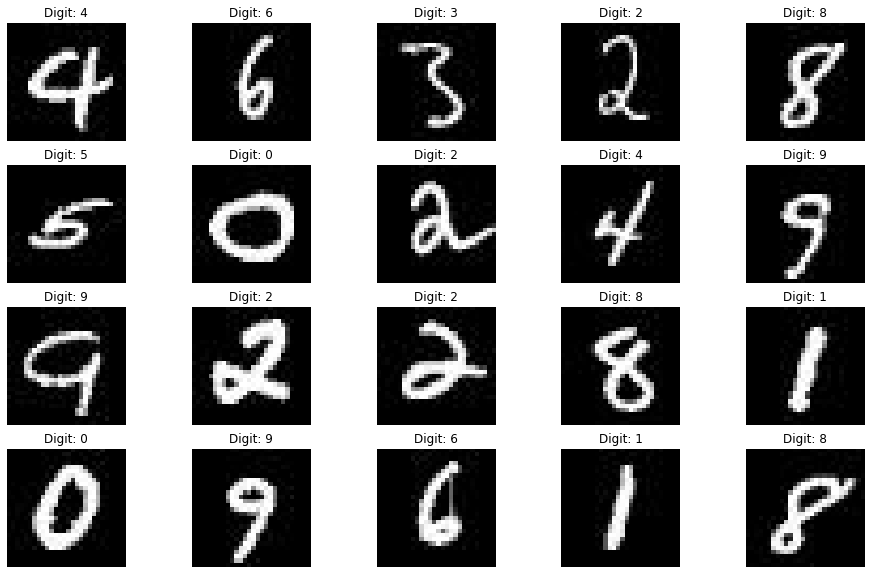

In [7]:
# Plot first 20 training images
plt.figure(figsize=(16, 10))
for images, labels in train_ds.take(1):
    for i in range(20):
        plot_digit(images[i], labels[i].numpy(), i)
plt.show()

In [8]:
# Build CNN model using Keras Sequential API
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

In [9]:
# Compile model with SGD optimizer and sparse categorical crossentropy loss
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',  # use sparse since labels are integers
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)


Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2527 - accuracy: 0.9227 - val_loss: 0.1058 - val_accuracy: 0.9676
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0626 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0516 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0477 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0418 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0425 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0407 -

In [11]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0445 - accuracy: 0.9870
Test loss: 0.0445
Test accuracy: 0.9870


1/1 [==============================] - 0s 26ms/step


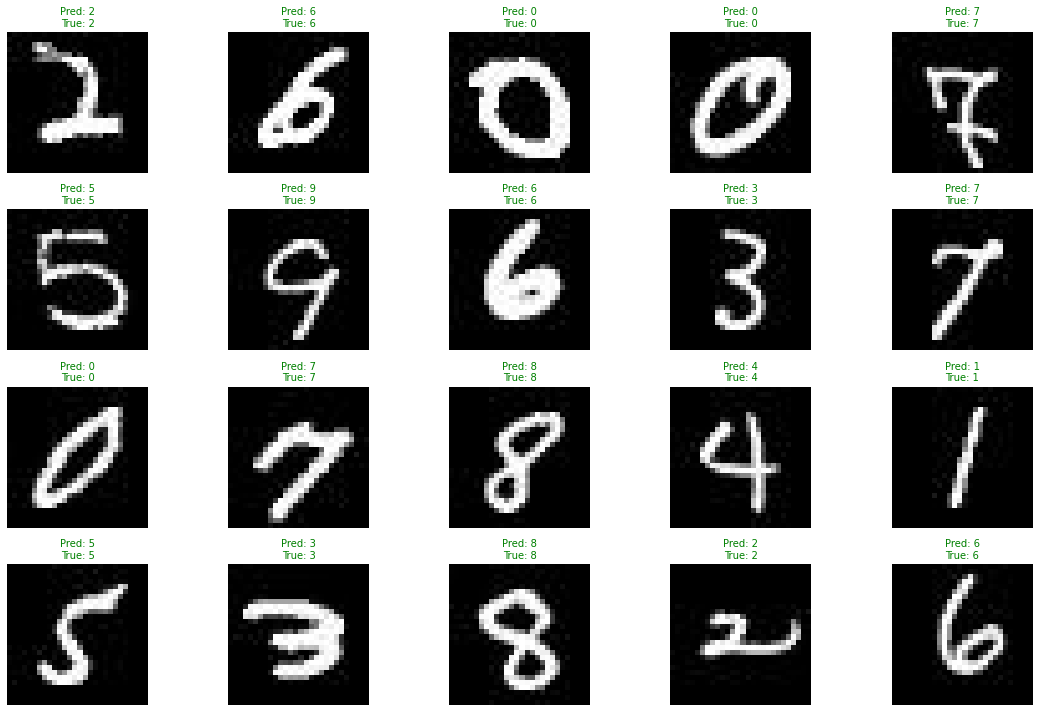

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# Function to plot image and its predicted label
def plot_digit(image, pred, true_label, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    color = 'green' if pred == true_label else 'red'
    plt.title(f"Pred: {pred}\nTrue: {true_label}", color=color, fontsize=10)
    plt.axis('off')

# Convert test_ds to a list of (image, label) tensors for easy random sampling
all_images = []
all_labels = []

for images, labels in test_ds.unbatch().take(10000):  # take all 10,000 test images
    all_images.append(images)
    all_labels.append(labels)

# Randomly select and predict 20 test images
plt.figure(figsize=(16, 10))
for i in range(20):
    idx = random.randint(0, len(all_images) - 1)
    image = all_images[idx]
    true_label = int(all_labels[idx].numpy())

    # Model prediction
    pred = np.argmax(model.predict(tf.expand_dims(image, axis=0))[0])

    # Plot
    plot_digit(image, pred, true_label, i)

plt.tight_layout()
plt.show()
